## Simple Linear Regression

In [27]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv("data2.csv")

In [29]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
df.drop(columns=['State'],inplace=True)

In [31]:
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)

In [47]:
X_test=scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression()

In [50]:
reg.fit(X_train,y_train)

LinearRegression()

In [51]:
from sklearn.model_selection import cross_val_score

In [54]:
mse = cross_val_score(reg,X_train,y_train,scoring ='neg_mean_squared_error', cv=20)

In [57]:
y_pred=reg.predict(X_test)

In [58]:
y_pred

array([125972.1482631 ,  85471.92270964,  98924.15168288,  46639.7862872 ,
       128142.12473185,  52602.19053671, 108364.69760175, 100331.58846892,
        97538.56674666, 112496.70398401, 128110.85388838, 173383.29618108,
        93334.03668271, 149432.23776236, 173293.94964905])

In [61]:
from sklearn.metrics import accuracy_score,r2_score

In [63]:
score = r2_score(y_pred,y_test)

In [64]:
score

0.9355141378867275

## Ridge Regression

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [68]:
ridge_reg = Ridge()

In [69]:
parameters = {'alpha':[1,2,3,4,5,30,40,50,70,90]}

In [72]:
ridgecv = GridSearchCV( ridge_reg, parameters , scoring='neg_mean_squared_error',cv=5)

In [74]:
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 30, 40, 50, 70, 90]},
             scoring='neg_mean_squared_error')

In [75]:
print(ridgecv.best_params_)

{'alpha': 1}


In [76]:
print(ridgecv.best_score_)

-102453900.83092666


In [78]:
ridge_pred=ridgecv.predict(X_test)

In [79]:
ridge_pred

array([125724.50508211,  85499.95505105,  97525.85797239,  47111.97782736,
       128376.4886078 ,  51417.48844906, 107553.47104156,  99961.12767724,
        95802.12036554, 109651.30286771, 127553.16226751, 171271.18102928,
        92667.39567922, 148924.25025537, 171919.96541116])

In [80]:
score=r2_score(ridge_pred,y_test)

In [81]:
score

0.9322773536823808

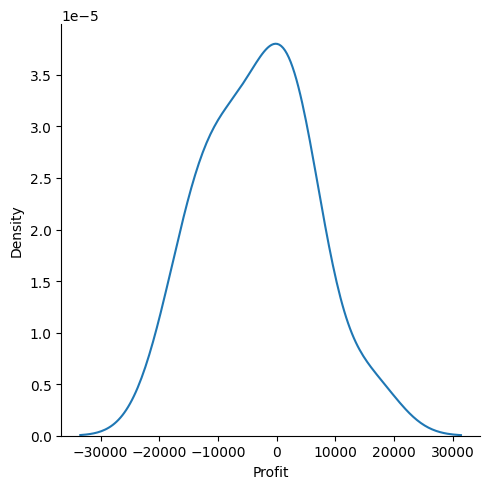

In [83]:
import seaborn as sns
sns.displot(ridge_pred-y_test, kind='kde')

## Lasso Regression

In [86]:
from sklearn.linear_model import Lasso

In [87]:
lasso=Lasso()

In [88]:
parameters = {'alpha':[1,2,3,4,5,30,40,50,70,90]}

In [89]:
lassocv = GridSearchCV( ridge_reg, parameters , scoring='neg_mean_squared_error',cv=5)

In [90]:
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 30, 40, 50, 70, 90]},
             scoring='neg_mean_squared_error')

In [92]:
print(lassocv.best_params_)

{'alpha': 1}


In [93]:
print(lassocv.best_score_)

-102453900.83092666


In [94]:
lasso_pred=ridgecv.predict(X_test)

In [95]:
score=r2_score(lasso_pred,y_test)

In [96]:
score

0.9322773536823808

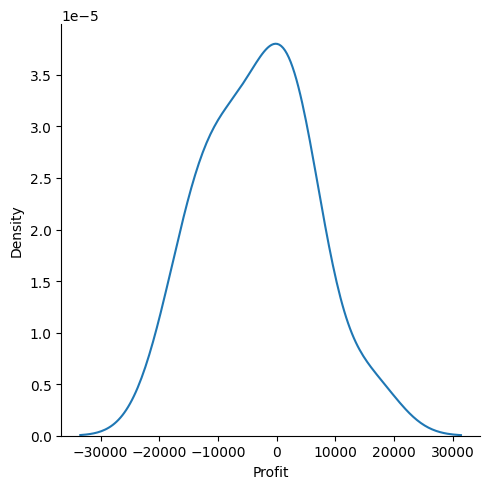

In [97]:
import seaborn as sns
sns.displot(lasso_pred-y_test, kind='kde')